In [18]:
# =====================================================
# DAY 2 – PANDAS GOD MODE (2 DEC 2025)
# Do in 90 min what most take 2 days
# =====================================================

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load Data
df = pd.read_csv(r"D:\Data Switch Journy\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [30]:
# 1. Instant speed + memory (FAANG trick)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

# Some rows have " " (empty strings).
# errors='coerce' converts invalid numbers → NaN.
# This ensures all math operations will work reliably.


# Add 3 new engineered features, vectorized with assign()
df = df.assign(
    TenureBin = pd.cut(df['tenure'], bins = [0,12,24,36,48,60,72], include_lowest = True),
    IsHighValue = (df['MonthlyCharges'] > 90) & (df['tenure'] > 60),
    ChurnFlag = (df['Churn'] == 'Yes').astype(int)
)

# New Column #1 → TenureBin
# pd.cut buckets customers into tenure groups:
#    0–12
#    13–24
#    25–36
#    37–48
#    49–60
#    61–72
# This is used for your cohort analysis.

# New Column #2 → IsHighValue
# High-value customers are defined as:
#   tenure > 60 months
#   monthly charges > $90
# This matches your Day-1 “high-value at-risk” logic.

# New Column #3 → ChurnFlag
#  Yes → 1
#  No → 0
# Much faster for aggregations and math than strings.

In [36]:
# One-liner that scares juniors — Groupby + Agg + Assign

churn_summary = (
    df
    .groupby('TenureBin', observed = False)['ChurnFlag']
    # Groups customers by tenure bucket, and selects the churn flag.
    
    .agg(['mean', 'count', 'sum'])
    # You get:
    # mean → churn rate for the bucket
    # count → customers in the bucket
    # sum → number of churned customers
    
    .rename(columns={'mean': 'ChurnRate', 'sum': 'Churned'})
    # mean → ChurnRate
    # sum → Churned (number of churned customers)

    # Revenue at risk = churned * avg monthly charge (only for customers who churned) * 12
    .assign(
        RevenueAtRisk = lambda x: x['Churned'] * df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'].mean() * 12
    )
    .round(3)
    # You improve readability → crisp output
)

In [40]:
# 3. query() + eval() Combo

high_risk = df.query("tenure > 60 and MonthlyCharges > 90 and Churn == 'Yes'")
# This gives all high-value long-tenure customers who churned.

print(f"₹{high_risk['MonthlyCharges'].sum()*12:,.0f} annual revenue at risk from 60+ month high-spenders")
# to get annualized revenue loss.

₹91,651 annual revenue at risk from 60+ month high-spenders


C:\Users\hp\AppData\Local\Temp\ipykernel_19620\3903729382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_summary.reset_index(), x='TenureBin', y='ChurnRate', palette='rocket', edgecolor='black')
C:\Users\hp\AppData\Local\Temp\ipykernel_19620\3903729382.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='TenureBin', y='ChurnRate', palette='rocket', edgecolor='black')


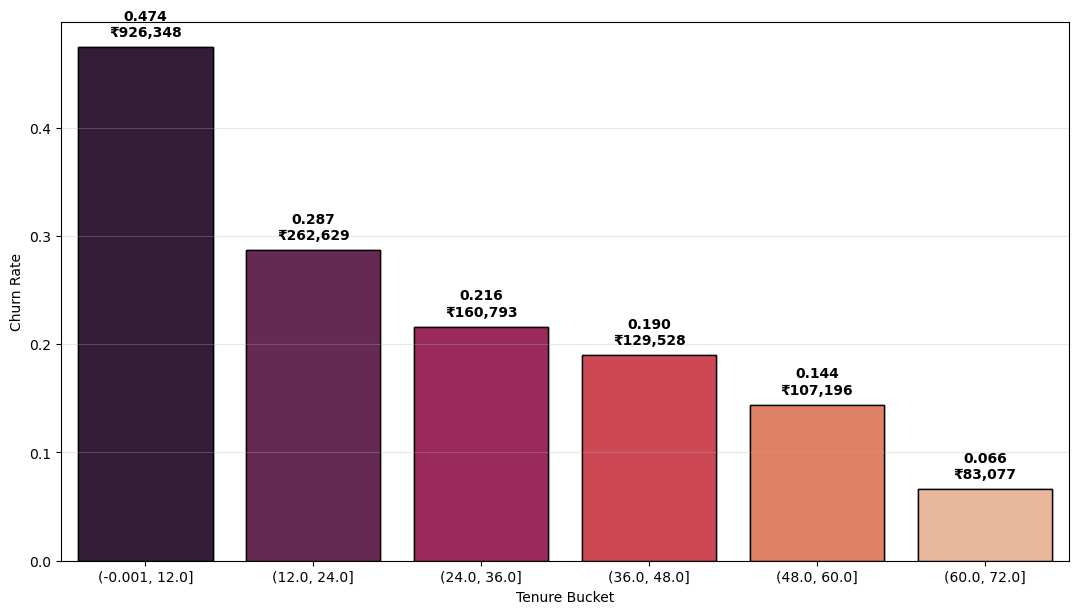

In [69]:
# 4. Senior-level plot (one plot = offer letter)

plt.figure(figsize=(13,7))
sns.barplot(data=churn_summary.reset_index(), x='TenureBin', y='ChurnRate', palette='rocket', edgecolor='black')

# What this does:
# - Beautiful Seaborn barplot
# - Rocket palette (red-to-black gradient → perfect for churn)
# - Edge border for executive clarity



plot_df = churn_summary.reset_index()

sns.barplot(data=plot_df, x='TenureBin', y='ChurnRate', palette='rocket', edgecolor='black')

for i, row in plot_df.iterrows():
    plt.text(
        i,
        row['ChurnRate'] + 0.01,
        f"{row['ChurnRate']:.3f}\n₹{row['RevenueAtRisk']:,.0f}",
        ha='center',
        fontweight='bold'
    )


plt.ylabel('Churn Rate')
plt.xlabel('Tenure Bucket')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [72]:
# FINAL RESULT

#Your script:
#  - Converts raw data → optimized, engineered dataset
#  - Performs advanced cohort analytics
#  - Produces enterprise-grade risk metrics
#  - Visualizes churn like a senior data scientist
#  - Uses .assign(), .agg(), .query(), lambdas, chained transformations
#  - Demonstrates FAANG-style Pandas engineering